In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
from itertools import combinations

import matplotlib.pyplot as plt
import plotly.express as px



In [ ]:
def filterCorrelation(df, absThresh):
    passed = set()
    for (r,c) in combinations(df.columns, 2):
        if (abs(df.loc[r,c]) >= absThresh):
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return df.loc[passed,passed]

In [ ]:
def isColumnMoreThanTwentyPerNan(df, colname):
  if (len(df[colname].loc[df[colname].isna()]) / len(df[colname])) >= 20:
    return True
  else:
    return False

In [ ]:
# Dataset Source : https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results

# raw_df = pd.read_csv("exoplanet_data.csv")
raw_df = pd.read_csv("exoplanets_kaggle.csv", index_col="rowid")
raw_df

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757


In [ ]:
from sklearn.preprocessing import LabelEncoder

raw_df[["kepid"]].value_counts()

kepid   
11968463    7
11442793    7
10187017    6
6541920     6
11709124    6
           ..
6452742     1
6451368     1
6451125     1
6449552     1
12935144    1
Length: 8214, dtype: int64

In [ ]:
raw_df["kepid"].head()

rowid
1    10797460
2    10797460
3    10811496
4    10848459
5    10854555
Name: kepid, dtype: int64

In [ ]:
pd.get_dummies(raw_df["kepid"])

,757450,892772,1025986,1026032,1026957,1027438,1161345,1161949,1164301,1293031,...,12735830,12736658,12737015,12784167,12785320,12833566,12834874,12835139,12885212,12935144
rowid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
le = LabelEncoder()
le.fit(raw_df["koi_disposition"])
raw_df["koi_disposition_enc"] = le.transform(raw_df["koi_disposition"])
raw_df["koi_disposition_enc"].value_counts()

2    5023
1    2293
0    2248
Name: koi_disposition_enc, dtype: int64

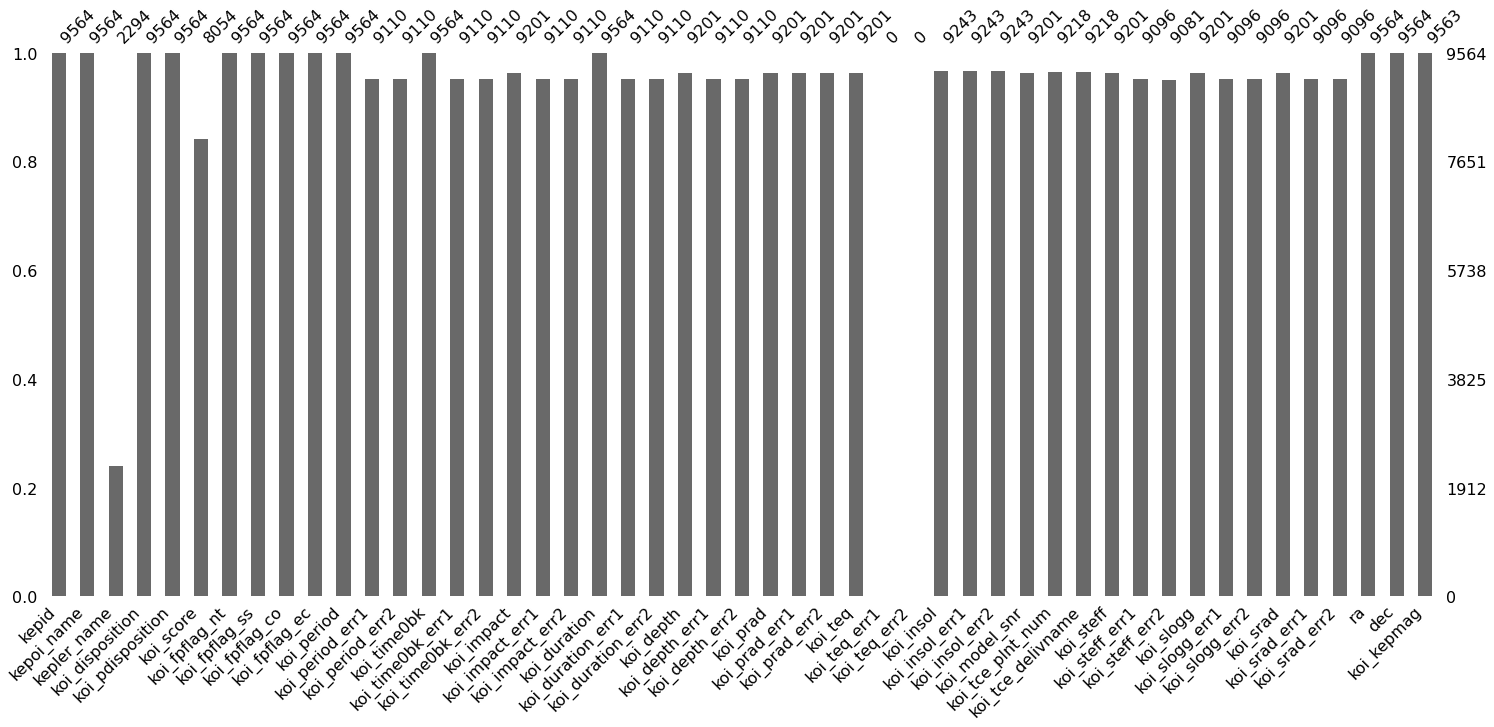

In [ ]:
msno.bar(raw_df)

In [ ]:
f"{(len(raw_df.kepler_name.loc[raw_df.kepler_name.isna()]) / len(raw_df.kepler_name)):.2%} of the kepler_name column is null"

'76.01% of the kepler_name column is null'

In [ ]:
nan_free_df = raw_df.drop([c for c in raw_df.columns if isColumnMoreThanTwentyPerNan(raw_df, c)])
nan_free_df

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757


In [ ]:
px.imshow(filterCorrelation(nan_free_df.corr(),0.75),aspect="auto",color_continuous_scale='RdBu_r')

In [ ]:
remove_err2_df = nan_free_df.drop(columns=[c for c in raw_df.columns if "err2" in c])
remove_err2_df

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_tce_delivname,koi_steff,koi_steff_err1,koi_slogg,koi_slogg_err1,koi_srad,koi_srad_err1,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,q1_q17_dr25_tce,5455.0,81.0,4.467,0.064,0.927,0.105,291.93423,48.141651,15.347
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,q1_q17_dr25_tce,5455.0,81.0,4.467,0.064,0.927,0.105,291.93423,48.141651,15.347
3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,q1_q17_dr25_tce,5853.0,158.0,4.544,0.044,0.868,0.233,297.00482,48.134129,15.436
4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,q1_q17_dr25_tce,5805.0,157.0,4.564,0.053,0.791,0.201,285.53461,48.285210,15.597
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,q1_q17_dr25_tce,6031.0,169.0,4.438,0.070,1.046,0.334,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,...,q1_q17_dr25_tce,5638.0,169.0,4.296,0.231,1.088,0.313,298.74921,46.973351,14.478
9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,q1_q17_dr25_tce,5638.0,139.0,4.529,0.035,0.903,0.237,297.18875,47.093819,14.082
9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,q1_q17_dr25_tce,6119.0,165.0,4.444,0.056,1.031,0.341,286.50937,47.163219,14.757


In [ ]:
px.imshow(filterCorrelation(remove_err2_df.corr(),0.75),aspect="auto",color_continuous_scale='RdBu_r')

In [ ]:
final_corr_drop_df = remove_err2_df.drop(columns=["koi_insol_err1", "koi_prad_err1"])
final_corr_drop_df

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_tce_delivname,koi_steff,koi_steff_err1,koi_slogg,koi_slogg_err1,koi_srad,koi_srad_err1,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,q1_q17_dr25_tce,5455.0,81.0,4.467,0.064,0.927,0.105,291.93423,48.141651,15.347
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,q1_q17_dr25_tce,5455.0,81.0,4.467,0.064,0.927,0.105,291.93423,48.141651,15.347
3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,q1_q17_dr25_tce,5853.0,158.0,4.544,0.044,0.868,0.233,297.00482,48.134129,15.436
4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,q1_q17_dr25_tce,5805.0,157.0,4.564,0.053,0.791,0.201,285.53461,48.285210,15.597
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,q1_q17_dr25_tce,6031.0,169.0,4.438,0.070,1.046,0.334,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,...,q1_q17_dr25_tce,5638.0,169.0,4.296,0.231,1.088,0.313,298.74921,46.973351,14.478
9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,q1_q17_dr25_tce,5638.0,139.0,4.529,0.035,0.903,0.237,297.18875,47.093819,14.082
9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,q1_q17_dr25_tce,6119.0,165.0,4.444,0.056,1.031,0.341,286.50937,47.163219,14.757


In [ ]:
for c in final_corr_drop_df.columns:
  if final_corr_drop_df[c].dtype != "object":
    print(c, "TYPE: ", final_corr_drop_df[c].dtype, "MAX: ", final_corr_drop_df[c].max(), "MIN: ", final_corr_drop_df[c].min())
  else:
    print(c, "TYPE: ", final_corr_drop_df[c].dtype)

kepid TYPE:  int64 MAX:  12935144 MIN:  757450
kepoi_name TYPE:  object
kepler_name TYPE:  object
koi_disposition TYPE:  object
koi_pdisposition TYPE:  object
koi_score TYPE:  float64 MAX:  1.0 MIN:  0.0
koi_fpflag_nt TYPE:  int64 MAX:  1 MIN:  0
koi_fpflag_ss TYPE:  int64 MAX:  1 MIN:  0
koi_fpflag_co TYPE:  int64 MAX:  1 MIN:  0
koi_fpflag_ec TYPE:  int64 MAX:  1 MIN:  0
koi_period TYPE:  float64 MAX:  129995.7784 MIN:  0.241842544
koi_period_err1 TYPE:  float64 MAX:  0.1725 MIN:  0.0
koi_time0bk TYPE:  float64 MAX:  1472.522306 MIN:  120.5159138
koi_time0bk_err1 TYPE:  float64 MAX:  0.569 MIN:  8.7e-06
koi_impact TYPE:  float64 MAX:  100.806 MIN:  0.0
koi_impact_err1 TYPE:  float64 MAX:  85.54 MIN:  0.0
koi_duration TYPE:  float64 MAX:  138.54 MIN:  0.052
koi_duration_err1 TYPE:  float64 MAX:  20.2 MIN:  0.0
koi_depth TYPE:  float64 MAX:  1541400.0 MIN:  0.0
koi_depth_err1 TYPE:  float64 MAX:  388600.0 MIN:  0.0
koi_prad TYPE:  float64 MAX:  200346.0 MIN:  0.08
koi_teq TYPE:  float6

In [ ]:
for c in final_corr_drop_df.columns:
  if final_corr_drop_df[c].dtype == "object":
    print(c)

kepoi_name
kepler_name
koi_disposition
koi_pdisposition
koi_tce_delivname


In [ ]:
final_corr_drop_df["kepoi_name"].value_counts() # drop

K00752.01    1
K05669.01    1
K05789.01    1
K05790.01    1
K05791.01    1
            ..
K00457.02    1
K00458.01    1
K02133.02    1
K00459.01    1
K07989.01    1
Name: kepoi_name, Length: 9564, dtype: int64

In [ ]:
final_corr_drop_df["kepler_name"].value_counts() # drop

Kepler-227 b     1
Kepler-1401 b    1
Kepler-132 c     1
Kepler-133 c     1
Kepler-133 b     1
                ..
Kepler-326 b     1
Kepler-326 c     1
Kepler-354 b     1
Kepler-1068 b    1
Kepler-1600 b    1
Name: kepler_name, Length: 2294, dtype: int64

In [ ]:
final_corr_drop_df["koi_disposition"].value_counts() # Y

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

In [ ]:
final_corr_drop_df["koi_pdisposition"].value_counts() # Drop

FALSE POSITIVE    5068
CANDIDATE         4496
Name: koi_pdisposition, dtype: int64

In [ ]:
final_corr_drop_df["koi_tce_delivname"].value_counts()

q1_q17_dr25_tce    8054
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: koi_tce_delivname, dtype: int64

In [ ]:
final_corr_drop_df["kepid"].value_counts()

11968463    7
11442793    7
10187017    6
11709124    6
6541920     6
           ..
8324518     1
6629993     1
6359926     1
5371777     1
10156110    1
Name: kepid, Length: 8214, dtype: int64

(0.0, 5.0)

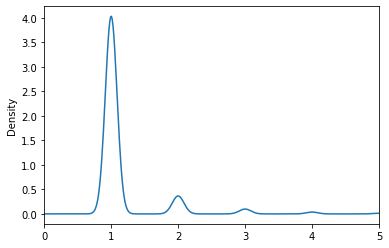

In [ ]:
kepid_vc = final_corr_drop_df["kepid"].value_counts()
kepid_vc.plot.density()
plt.xlim(left=0, right=5)

In [ ]:
removing_noise_df = final_corr_drop_df.drop(columns=["kepid","kepoi_name","kepler_name", "koi_pdisposition","koi_teq_err1","koi_tce_delivname"])
removing_noise_df

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_time0bk,koi_time0bk_err1,...,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_slogg,koi_slogg_err1,koi_srad,koi_srad_err1,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,CONFIRMED,1.000,0,0,0,0,9.488036,2.775000e-05,170.538750,0.002160,...,1.0,5455.0,81.0,4.467,0.064,0.927,0.105,291.93423,48.141651,15.347
2,CONFIRMED,0.969,0,0,0,0,54.418383,2.479000e-04,162.513840,0.003520,...,2.0,5455.0,81.0,4.467,0.064,0.927,0.105,291.93423,48.141651,15.347
3,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,175.850252,0.000581,...,1.0,5853.0,158.0,4.544,0.044,0.868,0.233,297.00482,48.134129,15.436
4,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,170.307565,0.000115,...,1.0,5805.0,157.0,4.564,0.053,0.791,0.201,285.53461,48.285210,15.597
5,CONFIRMED,1.000,0,0,0,0,2.525592,3.761000e-06,171.595550,0.001130,...,1.0,6031.0,169.0,4.438,0.070,1.046,0.334,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.846000e-04,132.016100,0.015700,...,1.0,5638.0,169.0,4.296,0.231,1.088,0.313,298.74921,46.973351,14.478
9561,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,131.705093,0.000170,...,1.0,5638.0,139.0,4.529,0.035,0.903,0.237,297.18875,47.093819,14.082
9562,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,133.001270,0.007690,...,1.0,6119.0,165.0,4.444,0.056,1.031,0.341,286.50937,47.163219,14.757


In [ ]:
removing_noise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9564 entries, 1 to 9564
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    9564 non-null   object 
 1   koi_score          8054 non-null   float64
 2   koi_fpflag_nt      9564 non-null   int64  
 3   koi_fpflag_ss      9564 non-null   int64  
 4   koi_fpflag_co      9564 non-null   int64  
 5   koi_fpflag_ec      9564 non-null   int64  
 6   koi_period         9564 non-null   float64
 7   koi_period_err1    9110 non-null   float64
 8   koi_time0bk        9564 non-null   float64
 9   koi_time0bk_err1   9110 non-null   float64
 10  koi_impact         9201 non-null   float64
 11  koi_impact_err1    9110 non-null   float64
 12  koi_duration       9564 non-null   float64
 13  koi_duration_err1  9110 non-null   float64
 14  koi_depth          9201 non-null   float64
 15  koi_depth_err1     9110 non-null   float64
 16  koi_prad           9201 

In [ ]:
removing_noise_df.dropna(how="any", axis=0, inplace=True)

In [ ]:
y = removing_noise_df[["koi_disposition"]]
y = le.transform(y)
y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 2, ..., 0, 2, 2])

In [ ]:
X = removing_noise_df.drop(columns="koi_disposition")
X

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_time0bk,koi_time0bk_err1,koi_impact,...,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_slogg,koi_slogg_err1,koi_srad,koi_srad_err1,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,1.000,0,0,0,0,9.488036,2.775000e-05,170.538750,0.002160,0.146,...,1.0,5455.0,81.0,4.467,0.064,0.927,0.105,291.93423,48.141651,15.347
2,0.969,0,0,0,0,54.418383,2.479000e-04,162.513840,0.003520,0.586,...,2.0,5455.0,81.0,4.467,0.064,0.927,0.105,291.93423,48.141651,15.347
3,0.000,0,1,0,0,19.899140,1.494000e-05,175.850252,0.000581,0.969,...,1.0,5853.0,158.0,4.544,0.044,0.868,0.233,297.00482,48.134129,15.436
4,0.000,0,1,0,0,1.736952,2.630000e-07,170.307565,0.000115,1.276,...,1.0,5805.0,157.0,4.564,0.053,0.791,0.201,285.53461,48.285210,15.597
5,1.000,0,0,0,0,2.525592,3.761000e-06,171.595550,0.001130,0.701,...,1.0,6031.0,169.0,4.438,0.070,1.046,0.334,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,0.000,0,0,0,1,8.589871,1.846000e-04,132.016100,0.015700,0.765,...,1.0,5638.0,169.0,4.296,0.231,1.088,0.313,298.74921,46.973351,14.478
9561,0.000,0,1,1,0,0.527699,1.160000e-07,131.705093,0.000170,1.252,...,1.0,5638.0,139.0,4.529,0.035,0.903,0.237,297.18875,47.093819,14.082
9562,0.497,0,0,0,0,1.739849,1.780000e-05,133.001270,0.007690,0.043,...,1.0,6119.0,165.0,4.444,0.056,1.031,0.341,286.50937,47.163219,14.757


In [ ]:
from sklearn.preprocessing import MinMaxScaler


mms = MinMaxScaler()
mms.fit(X)
X_scaled = mms.transform(X)

In [ ]:
X_scaled

array([[1.        , 0.        , 0.        , ..., 0.55240461, 0.73383732,
        0.69270188],
       [0.969     , 0.        , 0.        , ..., 0.55240461, 0.73383732,
        0.69270188],
       [0.        , 0.        , 1.        , ..., 0.78431242, 0.73335999,
        0.70005786],
       ...,
       [0.497     , 0.        , 0.        , ..., 0.30429396, 0.67174867,
        0.64393752],
       [0.021     , 0.        , 0.        , ..., 0.65442577, 0.67257754,
        0.69584263],
       [0.        , 0.        , 0.        , ..., 0.78453881, 0.66907089,
        0.64964047]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test, y_test)

0.8920716112531969

In [ ]:
# Actually does the prediction
pred = rf.predict(X_test)

In [ ]:
pred

array([2, 2, 2, ..., 1, 2, 2])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


confusion_matrix(y_test, pred)

array([[316,  99,  16],
       [ 81, 481,  11],
       [  3,   1, 947]])

In [ ]:

print(classification_report(y_test, pred, target_names=removing_noise_df["koi_disposition"].unique()))

                precision    recall  f1-score   support

     CONFIRMED       0.79      0.73      0.76       431
FALSE POSITIVE       0.83      0.84      0.83       573
     CANDIDATE       0.97      1.00      0.98       951

      accuracy                           0.89      1955
     macro avg       0.86      0.86      0.86      1955
  weighted avg       0.89      0.89      0.89      1955



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
abc_pred = abc.predict(X_test)
abc_pred

array([2, 2, 2, ..., 1, 2, 2])

In [ ]:
print(classification_report(y_test, abc_pred, target_names=removing_noise_df["koi_disposition"].unique()))

                precision    recall  f1-score   support

     CONFIRMED       0.69      0.58      0.63       431
FALSE POSITIVE       0.67      0.81      0.73       573
     CANDIDATE       0.99      0.95      0.97       951

      accuracy                           0.82      1955
     macro avg       0.79      0.78      0.78      1955
  weighted avg       0.83      0.82      0.82      1955



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.822


In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, knn_pred, target_names=removing_noise_df["koi_disposition"].unique()))

                precision    recall  f1-score   support

     CONFIRMED       0.64      0.51      0.57       431
FALSE POSITIVE       0.68      0.77      0.72       573
     CANDIDATE       0.99      1.00      0.99       951

      accuracy                           0.82      1955
     macro avg       0.77      0.76      0.76      1955
  weighted avg       0.82      0.82      0.82      1955



In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
c_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, c_pred, target_names=removing_noise_df["koi_disposition"].unique()))

                precision    recall  f1-score   support

     CONFIRMED       0.78      0.51      0.62       431
FALSE POSITIVE       0.71      0.87      0.78       573
     CANDIDATE       0.98      1.00      0.99       951

      accuracy                           0.85      1955
     macro avg       0.82      0.79      0.80      1955
  weighted avg       0.86      0.85      0.85      1955



In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
s_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, s_pred, target_names=removing_noise_df["koi_disposition"].unique()))

                precision    recall  f1-score   support

     CONFIRMED       0.85      0.35      0.50       431
FALSE POSITIVE       0.66      0.94      0.77       573
     CANDIDATE       0.99      1.00      0.99       951

      accuracy                           0.84      1955
     macro avg       0.83      0.76      0.76      1955
  weighted avg       0.86      0.84      0.82      1955

